# Importing required Libraries ...

In [2]:
from math import exp
from random import seed
from random import random
import numpy as np

# Forward Pass


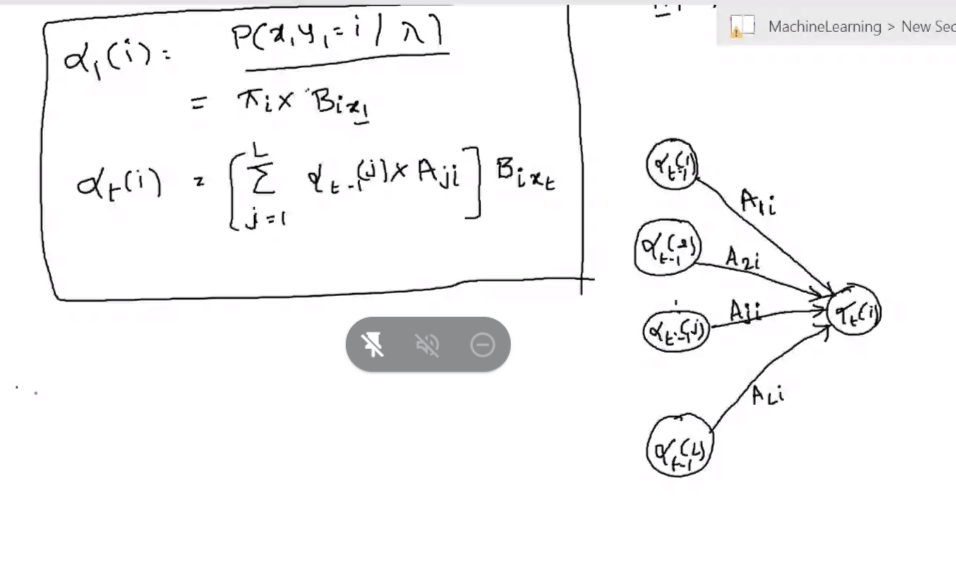

# Backward Pass

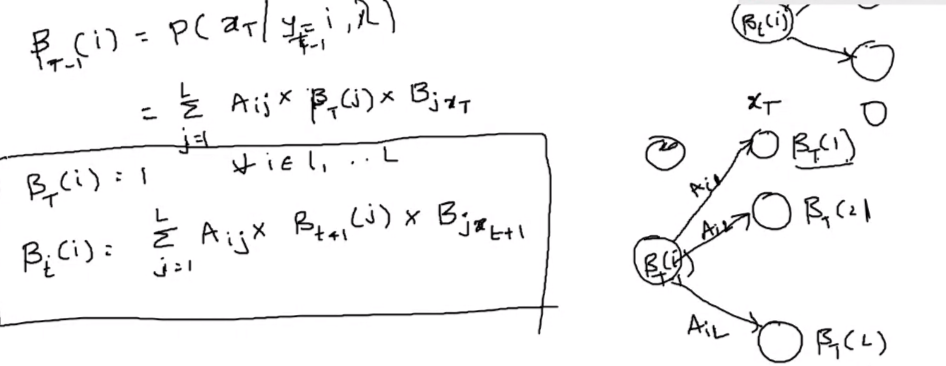

# Gamma  Calculation

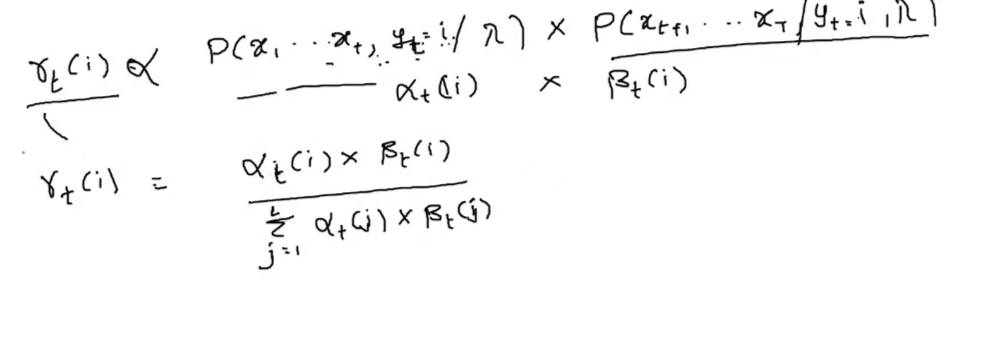

In [7]:
# Sequence Labelling
# B matrix is for label as row and column denotes the word
# A matrix is for label current as row and next label as column
B = np.array([[0.3,0.2,0.5],[0.4,0.2,0.4]],dtype='f')
A = np.array([[0.3,0.7],[0.6,0.4]],dtype='f')
# p is the initial matrix for labeles probability for the given start word
p = np.array([0.7,0.3],dtype='f')
labels = A.shape[0] # Total labels that we have
sequence = [1,2,3,1] # Sequence of text that we get
alpha = np.zeros((labels,len(sequence)),dtype='f')
beta = np.zeros((labels,len(sequence)),dtype='f')
# Calculation of Alpha or Forward Pass
for i in range(len(sequence)):
    if i == 0:
        # Just began i == 0
        for j in range(labels):
            alpha[j][i] = p[j]*B[j][sequence[i]-1]
    else:
        prev = i - 1
        for j in range(labels):
            summation = 0
            for k in range(labels):
                summation += alpha[k][prev]*A[k][j]*B[j][sequence[i]-1]
            alpha[j][i] = summation
# Calculation of Beta or Backward Pass
for i in range(len(sequence)-1,-1,-1):
    if i == len(sequence)-1:
        # last layer is hit
        for j in range(labels):
            beta[j][i] = 1
    else:
        prev = i + 1
        for j in range(labels):
            summation = 0
            for k in range(labels):
                summation += A[j][k]*beta[k][prev]*B[k][sequence[prev]-1]
            beta[j][i] = summation
print("Alpha Values ")
print(alpha)
print("Beta Values ")
print(beta)
gamma = np.zeros((labels,len(sequence)),dtype='f')
for i in range(len(sequence)):
    summation = 0
    for k in range(labels):
        summation += alpha[k][i]*beta[k][i]
    for j in range(labels):
        gamma[j][i] = alpha[j][i]*beta[j][i]/summation
print("Gamma Value")
print(gamma)
print("Precited Labels for the given sequence when prior, A and b matrices are given is")
labels_pred = np.argmax(gamma,axis = 0)
for l in labels_pred:
    print(l+1,"",end="")

Alpha Values 
[[0.21000001 0.027      0.01575    0.0039015 ]
 [0.12       0.039      0.0138     0.006618  ]]
Beta Values 
[[0.032198   0.15070002 0.37       1.        ]
 [0.031316   0.16540001 0.34000003 1.        ]]
Gamma Value
[[0.6427663  0.38679597 0.5539712  0.37088266]
 [0.35723373 0.613204   0.4460288  0.6291173 ]]
Precited Labels for the given sequence when prior, A and b matrices are given is
1 2 1 2 